In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import itertools
import scipy.stats as scs

In [0]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import similarities
from gensim import models


In [0]:
from datetime import datetime
import pickle
from google.colab import files
from io import BytesIO
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [0]:
# The csv file of doc_2vec was created from Topic_modelling juypter notebook and saved in the following path 
doc2vec_df = pd.read_pickle('/content/drive/My Drive/capstone3/doc2vec_df.pkl')

In [0]:
ks = [4,5,6,7,8]
x=doc2vec_df.values

In [0]:
doc2vec_arr=doc2vec_df.values

silhouette = []
for k in ks:
  km = KMeans(k)
  y = km.fit_predict(x)
  silhouette.append(silhouette_score(x,y))

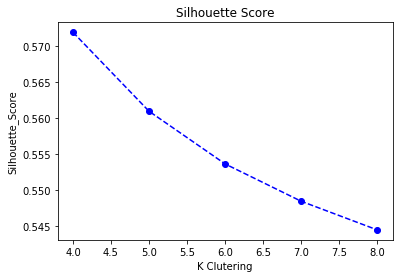

In [0]:
plt.plot(ks, silhouette, linestyle='--', marker='o', color='b')
plt.ylabel('Silhouette_Score')
plt.xlabel('K Clutering')
plt.title('Silhouette Score')
plt.savefig('/content/drive/My Drive/capstone3/shil_score');

In [7]:
# top_5_df.pkl file was created from Topic modelling juypternotebook after analyzing LDA
top_5_topics = pd.read_pickle('/content/drive/My Drive/capstone3/amazon_review_analysis/Topic_modelling/model/top_5_df.pkl')
top_5_topics

,0,1
0,0,"0.021*""flavor"" + 0.016*""taste"" + 0.015*""amazon"" + 0.013*""store"" + 0.013*""price"" + 0.013*""chocolate"" + 0.012*""love"" + 0.012*""time"" + 0.012*""box"" + 0.011*""bag"""
1,1,"0.124*""coffee"" + 0.043*""cup"" + 0.028*""flavor"" + 0.022*""taste"" + 0.016*""kcup"" + 0.012*""blend"" + 0.011*""price"" + 0.010*""pod"" + 0.010*""love"" + 0.010*""bean"""
2,2,"0.078*""food"" + 0.034*""cat"" + 0.031*""dog"" + 0.012*""day"" + 0.011*""time"" + 0.011*""year"" + 0.010*""baby"" + 0.009*""month"" + 0.009*""brand"" + 0.009*""ingredient"""
3,3,"0.125*""tea"" + 0.053*""dog"" + 0.053*""treat"" + 0.022*""bag"" + 0.015*""flavor"" + 0.015*""time"" + 0.014*""love"" + 0.010*""chew"" + 0.010*""day"" + 0.009*""tooth"""
4,4,"0.036*""water"" + 0.034*""taste"" + 0.032*""sugar"" + 0.026*""flavor"" + 0.019*""drink"" + 0.016*""milk"" + 0.014*""bottle"" + 0.013*""cereal"" + 0.012*""coconut"" + 0.011*""protein"""


Saving 5_cluster.png to 5_cluster.png


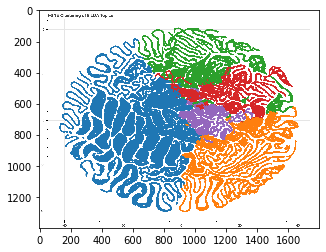

In [8]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['5_cluster.png']))
plt.imshow(im)
plt.show()


After checking Topic modelling and Kmeans, I believe that 5 different clustering is the most appropriate

# 5 Clustering is following:
Cluster Index     Category
   0.              Snack
   1.              Coffee
   3.              Pet Food
   4.               Tea
   5.             Water & Milk

** Classfy each product into 5 different category from KMeans**

In [9]:
start = datetime.now()
prediction = {}
for k in ks:
  prediction[k] = KMeans(k, random_state=0).fit_predict(x)

cluster_pre_df = pd.DataFrame(prediction)

end = datetime.now()
print('Duration:{}'.format(end-start))
cluster_pre_df.columns = ['cluster_'+str(x) for x in cluster_pre_df.columns]
cluster_pre_df.to_pickle('/content/drive/My Drive/capstone3/cluster_pre_df.pkl')

Duration:0:10:09.295342


In [10]:
df = pd.read_csv('/content/drive/My Drive/capstone3/data/doc_train.csv')
cluster_pre_df = pd.read_pickle('/content/drive/My Drive/capstone3/cluster_pre_df.pkl')
new_df = pd.concat([df, cluster_pre_df], axis = 1)
new_df = new_df[['Id', 'ProductId', 'UserId', 'Score', 'cluster_5','data_lemmatized', 'Text']]
new_df.head(1)

,Id,ProductId,UserId,Score,cluster_5,data_lemmatized,Text
0,491451,B005A1LH0Q,A2Z3EDGYBA75F5,4,2,"['snack', 'amount', 'crunch', 'hint', 'cinnamon', 'flavor']","I was pleasantly surprised at these little snacks. Thought sure they wouldn't fill me up, but they did. Had just the right amount of crunch and a hint of cinnamon flavor that was not overpowering or bitter."


In [11]:
print('Number of unique users: {}'.format(len(new_df['UserId'].value_counts())))
print('Number of unique id: {}'.format(len(new_df['ProductId'].value_counts())))
print('Number of score: {}'.format(new_df.shape[0]))

Number of unique users: 133285
Number of unique id: 52852
Number of score: 253370


**Find the Top 20 items that received more than 100 reviews and also the highest average scores from those reviews**

In [0]:
# find best 10 items in each 5 category that had more than 300 reviews and then their average scores were above 4.5

product_review_count = df['ProductId'].value_counts()

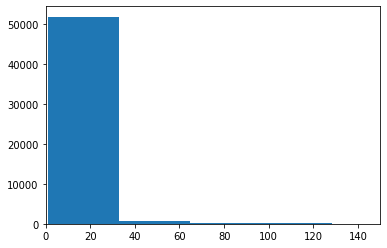

In [13]:
plt.hist(product_review_count, bins = 20)
plt.xlim(0,150);

In [14]:
# find the items that have more than 100 reivews and scores
product_index =product_review_count[product_review_count>  100]
product_index

B007JFMH8M    637
B005K4Q4LK    401
B003B3OOPA    399
B005K4Q1YA    383
B005K4Q34S    378
             ... 
B002HQLY7S    101
B000X1Q1G8    101
B002LN1ME2    101
B003SSWCJI    101
B003EM7J9Q    101
Name: ProductId, Length: 260, dtype: int64

In [15]:
selected_df=new_df[new_df['ProductId'].isin(product_index.index)][['ProductId','Score', 'cluster_5', 'data_lemmatized', 'Text']]
selected_df.head(5)

,ProductId,Score,cluster_5,data_lemmatized,Text
1,B007PA32L2,5,0,"['coffee', 'product', 'cup', 'price']","Great coffee, available only in the fall. Have had it before and the Green Mountain products are good. Would like to buy the K Cups at a lesser price."
6,B004FEN3GK,5,1,"['packaging', 'package', 'cracker', 'ziplock_baggie', 'turn', 'softbr', 'stack', 'amount', 'bag', 'snacking', 'course', 'honey_maid', 'taste', 'yum']","Brilliant packaging! Rarely do we go through an entire package of the regular sized cracker, which means I have to find a ziplock baggie, and make sure they get eaten before they turn from crispy to soft.<br />With these fresh stacks I get just the right amount, no worrying about them going stale, and they are so much easier to toss into the bag for on the go snacking. Plus, of course, the delicious honey maid taste. Yum!"
11,B008GRONV6,5,2,"['dog', 'longterm', 'medication', 'year', 'pill', 'cheese', 'meat', 'calorie', 'pill_pocket', 'love', 'medicine', 'battle', 'consistency', 'pill', 'use', 'twiceaday', 'medicine', 'time', 'training', 'time', 'treat', 'use', 'size', 'pill', 'bag', 'price', 'amazon', 'shipping', 'store', 'portion', 'pill_pocket', 'pill', 'calorie', 'medicine', 'hope']","One of our beloved dogs has seizures and is on long-term medication - and has been for a few years now. When we started giving her pills, we tried cheese, peanut butter, meat, etc... but I worried about the extra calories. Our vet recommended pill pockets and we LOVE them! She thinks it's a treat - so no medicine battles - and it is the perfect consistency so that the pills don't fall out and she can't just lick it off (like peanut butter). I use the twice-a-day medicine time as training time since these are treats to her! :-) It is super easy and we use the larger size and divide them in half for her smaller pills so the bag lasts longer. The price on Amazon (as long as I have free shipping) is GREAT and better than most pet stores. Because I can use a small portion of the pill pocket and it holds/hides the pill and she takes it greedily - I don't worry she's getting too many extra calories AND I KNOW she's getting her medicine! I hope they NEVER stop making them!"
30,B007JFMH8M,4,0,"['son', 'cookie', 'cookie', 'bit']","My 5 yr old son loved the cookies. I enjoyed it as well, I am just used to cookies being a bit sweeter."
32,B002GJ9JY6,5,3,"['fatcalorie', 'contentbr', 'lowsalt', 'product', 'someone', 'house', 'balk', 'dash', 'honey', 'agave', 'work', 'texture', 'mix', 'jar', 'consistency', 'sugar', 'factory', 'seal', 'jar', 'trust', 'mebr', 'mix', 'spoon', 'bowl', 'pinch', 'usage', 'recipe', 'website', 'bell_plantation', 'chocolatepb', 'fan', 'spoon', 'cracker', 'bananaapple', 'slice', 'summerbr', 'storage', 'bit', 'shelf_life', 'projection', 'year', 'company', 'month', 'size', 'case', 'cost', 'website', 'shipping', 'purchase', 'cost', 'try', 'jar', 'container', 'company', 'purchase', 'product', 'price', 'pro', 'calorie', 'content', 'hand', 'dog', 'con', 'cost', 'portion_control', 'neededbr', 'change', 'life', 'craving']","I love high-octane peanut butter, but not the fat/calorie content.<br /><br />TASTE: If you are accustomed to low-salt or raw products, the taste will be fine. If someone in the house balks at the taste, you can toss in a dash of fine sea salt or honey (agave works well too). You could easily mix PB2 with PB to wean onto this gradually.<br /><br />TEXTURE: Mixes fast and is very smooth (surprisingly). From the jar, it's similar in consistency to powdered sugar. Open factory seal on jar carefully so it doesn't fly out (trust me).<br /><br />MIXING: Easily mixes using a small spoon or spatula in a gently sloping small bowl (I use a pinch bowl)<br /><br />USAGE: PB2 has recipes on their website (Bell Plantation) and they also sell a chocolate/pb product. I'm a fan of straight PB2 (a spoon by itself) but have had PB2 on crackers, sprinkled on banana/apple slices, and am looking forward to making homemade PB

In [16]:
# after selecting the items that have more than 100 reviews and then subsetting the dataset for each cluster, with that subset of dataset find the items that have top 20 average scores
recommend_item = {}
recommend_item_scores = {}
num = [0,1,2,3,4]

for i in num:
  sub_selected_df = selected_df[selected_df['cluster_5']==i]
  item_scores=sub_selected_df.groupby('ProductId')['Score'].mean().sort_values(ascending = False).iloc[:20]
  recommend_item_scores[i] = item_scores
  item_index = item_scores.index
  recommend_item[i] = item_index[:20]
recommend_item

{0: Index(['B000GAT6NG', 'B001E8DHPW', 'B00474CSVE', 'B007TJGZ18', 'B005GX8MMO',
        'B003QDRJXY', 'B001EO5Q64', 'B000NMJWZO', 'B008BY7NSE', 'B007R900WA',
        'B001BS4G6O', 'B003FDC2I2', 'B003B3OOPA', 'B00451WLYI', 'B000QSON4K',
        'B00438XVGU', 'B0049ULB78', 'B0032CB15Q', 'B003D4F1QS', 'B0030VJ70K'],
       dtype='object', name='ProductId'),
 1: Index(['B005K4Q34S', 'B004JRXZKM', 'B001E8DHPW', 'B000UBD88A', 'B001ELL60W',
        'B007PA30TG', 'B005V9UG18', 'B007R900WA', 'B000PDY3HI', 'B005K4Q1VI',
        'B002LN1ME2', 'B007TJGZ18', 'B000NMJWZO', 'B0013A0QXC', 'B0034EDLS2',
        'B0034EDMCW', 'B001D0DMMY', 'B0034EFIYC', 'B000GAT6NG', 'B003G52BN0'],
       dtype='object', name='ProductId'),
 2: Index(['B004EAGP74', 'B003QDRJXY', 'B007R900WA', 'B001ELL60W', 'B004P4POZ8',
        'B000GAT6NG', 'B000NMJWZO', 'B008BY7O9W', 'B003B3OOPA', 'B001E8DHPW',
        'B009E7YC54', 'B0030VBQ5Y', 'B002HQLY7S', 'B0030VBPN2', 'B008BY7NSE',
        'B0043WOANY', 'B00954NY46', 'B003D4F1QS

In [17]:
recommend_item_scores

{0: ProductId
 B000GAT6NG    4.868421
 B001E8DHPW    4.810811
 B00474CSVE    4.806452
 B007TJGZ18    4.800000
 B005GX8MMO    4.777778
 B003QDRJXY    4.770833
 B001EO5Q64    4.770115
 B000NMJWZO    4.766667
 B008BY7NSE    4.763636
 B007R900WA    4.760870
 B001BS4G6O    4.741935
 B003FDC2I2    4.725490
 B003B3OOPA    4.723577
 B00451WLYI    4.722222
 B000QSON4K    4.718750
 B00438XVGU    4.716981
 B0049ULB78    4.714286
 B0032CB15Q    4.705882
 B003D4F1QS    4.692308
 B0030VJ70K    4.689655
 Name: Score, dtype: float64, 1: ProductId
 B005K4Q34S    5.0
 B004JRXZKM    5.0
 B001E8DHPW    5.0
 B000UBD88A    5.0
 B001ELL60W    5.0
 B007PA30TG    5.0
 B005V9UG18    5.0
 B007R900WA    5.0
 B000PDY3HI    5.0
 B005K4Q1VI    5.0
 B002LN1ME2    5.0
 B007TJGZ18    5.0
 B000NMJWZO    5.0
 B0013A0QXC    5.0
 B0034EDLS2    5.0
 B0034EDMCW    5.0
 B001D0DMMY    5.0
 B0034EFIYC    5.0
 B000GAT6NG    5.0
 B003G52BN0    5.0
 Name: Score, dtype: float64, 2: ProductId
 B004EAGP74    4.971429
 B003QDRJXY    4

In [0]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['data_lemmatized'])]

In [19]:
# load the Doc2vec model, corpus, dct created from topic modelling juypternotebook
model = Doc2Vec.load('/content/drive/My Drive/capstone3/doc2vec.model')
corpus = pickle.load(open('/content/drive/My Drive/capstone3/data/corpus.pkl', 'rb'))
dct = corpora.Dictionary.load('/content/drive/My Drive/capstone3/dct.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# since I decide that 5 topic is appropriate, I will use 5 for num_topics in LsiModel  
lsi = models.LsiModel(corpus, id2word = dct, num_topics = 5)

In [21]:
# to check whether 5 number of topics does make sense. 
#cluster -> coffee # 1 
doc = 'coffee is delicious'
vec_bow= dct.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
print(vec_lsi)

[(0, 0.5391487786836722), (1, -0.5895068483493694), (2, -0.4410888755184868), (3, -0.273213356268446), (4, -0.011305201677400355)]


In [22]:
# cluster -> tea # 3
doc1 = 'tea tastes lemon'
vec_bow1= dct.doc2bow(doc1.lower().split())
vec_lsi1 = lsi[vec_bow1]
print(vec_lsi1)

[(0, 0.3158774281897218), (1, -0.08915242281917958), (2, 0.8446979857324276), (3, -0.40967664103857176), (4, -0.02254821473477592)]


In [23]:
# cluster -> dog & cat food #2
doc2 = 'My dog loves jerkey'
vec_bow2= dct.doc2bow(doc2.lower().split())
vec_lsi2 = lsi[vec_bow2]
print(vec_lsi2)

[(0, 0.1977584470030295), (1, 0.3655643650734001), (2, -0.1265616181025953), (3, -0.07724257682016328), (4, -0.7181133470756499)]


In [24]:
# cluster -> mile & water & cereal # 4
doc3 = 'protein bar is not bad'
vec_bow3= dct.doc2bow(doc3.lower().split())
vec_lsi3 = lsi[vec_bow3]
print(vec_lsi3)

[(0, 0.0683768318875696), (1, 0.03744766166356227), (2, 0.00815943478645547), (3, 0.17604078188790226), (4, -0.003906969875101689)]


In [25]:
# Initailizing Query Structres
#index = similarities.MatrixSimilarity(lsi[corpus])

#index.save('/content/drive/My Drive/capstone3/corpus_index.index')
index = similarities.MatrixSimilarity.load('/content/drive/My Drive/capstone3/corpus_index.index')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


**Recommend System**

In [26]:
# new words as an input to find the item
# vec_lsi was 'coffee is delicious'
sims = index[vec_lsi]
result = list(enumerate(sims))
item_index = np.argmax([v[1] for i, v in enumerate(result)])
cluster_num=new_df.iloc[item_index]['cluster_5']


re_item = recommend_item[cluster_num]
re_item

Index(['B004EAGP74', 'B003QDRJXY', 'B007R900WA', 'B001ELL60W', 'B004P4POZ8',
       'B000GAT6NG', 'B000NMJWZO', 'B008BY7O9W', 'B003B3OOPA', 'B001E8DHPW',
       'B009E7YC54', 'B0030VBQ5Y', 'B002HQLY7S', 'B0030VBPN2', 'B008BY7NSE',
       'B0043WOANY', 'B00954NY46', 'B003D4F1QS', 'B0030VJ70K', 'B003D4MW38'],
      dtype='object', name='ProductId')

In [0]:
# load the Doc2vec model, corpus, dct created from topic modelling juypternotebook
#model = Doc2Vec.load('/content/drive/My Drive/capstone3/doc2vec.model')
#corpus = pickle.load(open('/content/drive/My Drive/capstone3/data/corpus.pkl', 'rb'))
#dct = corpora.Dictionary.load('/content/drive/My Drive/capstone3/dct.gensim')

def find_items(string):
  vec_bow= dct.doc2bow(string.lower().split())
  vec_lsi = lsi[vec_bow]
  sims = index[vec_lsi]
  result = list(enumerate(sims))
  item_index = np.argmax([v[1] for i, v in enumerate(result)])
  cluster_num=new_df.iloc[item_index]['cluster_5']

  re_item = recommend_item[cluster_num]
  return (cluster_num, re_item)

In [28]:
find_items('dark chocolate')

(0,
 Index(['B000GAT6NG', 'B001E8DHPW', 'B00474CSVE', 'B007TJGZ18', 'B005GX8MMO',
        'B003QDRJXY', 'B001EO5Q64', 'B000NMJWZO', 'B008BY7NSE', 'B007R900WA',
        'B001BS4G6O', 'B003FDC2I2', 'B003B3OOPA', 'B00451WLYI', 'B000QSON4K',
        'B00438XVGU', 'B0049ULB78', 'B0032CB15Q', 'B003D4F1QS', 'B0030VJ70K'],
       dtype='object', name='ProductId'))

In [29]:
find_items('which dog food is great')

(2,
 Index(['B004EAGP74', 'B003QDRJXY', 'B007R900WA', 'B001ELL60W', 'B004P4POZ8',
        'B000GAT6NG', 'B000NMJWZO', 'B008BY7O9W', 'B003B3OOPA', 'B001E8DHPW',
        'B009E7YC54', 'B0030VBQ5Y', 'B002HQLY7S', 'B0030VBPN2', 'B008BY7NSE',
        'B0043WOANY', 'B00954NY46', 'B003D4F1QS', 'B0030VJ70K', 'B003D4MW38'],
       dtype='object', name='ProductId'))